# 1 - Analisando Dados de Pacientes

Estamos estudando inflamação em pacientes que receberam um novo tratamento para artrite, precisamos analisar a primeira dúzia de conjuntos de dados. Os conjuntos de dados são armazenados em valores separados por vírgula no formato CSV: cada linha contém informações para um único paciente, e as colunas representam dias sucessivos.

In [2]:
import pandas as pd
dados = pd.read_csv('dados/inflammation-01.csv')

### Verificando a dimensão dos dados

In [49]:
dados.shape

(60, 40)

In [51]:
dados.head()

,dia0,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,...,dia30,dia31,dia32,dia33,dia34,dia35,dia36,dia37,dia38,dia39
0,0,0,1,3,1,2,4,7,8,3,...,4,4,5,7,3,4,2,3,0,0
1,0,1,2,1,2,1,3,2,2,6,...,3,5,4,4,5,5,1,1,0,1
2,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1
3,0,0,2,0,4,2,2,1,6,7,...,3,5,6,3,3,4,2,3,2,1
4,0,1,1,3,3,1,3,5,2,4,...,9,6,3,2,2,4,2,0,1,1


### Manipulando os dados

Usando loc para pegar linhas e colunas específicas do dataframe

In [54]:
dados.loc[[1,20,35],['dia0','dia1','dia10']]

,dia0,dia1,dia10
1,0,1,10
20,0,1,2
35,0,0,8


Usando loc para pegar dados que satisfazem uma condição

In [71]:
dados.loc[dados['dia30'] > 9]

,dia0,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,...,dia30,dia31,dia32,dia33,dia34,dia35,dia36,dia37,dia38,dia39
2,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1
15,0,1,1,0,1,2,4,3,6,4,...,10,9,5,6,5,3,4,2,2,0
30,0,1,1,0,3,2,4,6,8,6,...,10,4,2,6,5,5,2,3,2,1
43,0,0,1,3,1,4,3,6,7,8,...,10,2,5,1,5,4,2,1,0,1
44,0,1,1,3,3,4,4,6,3,4,...,10,6,8,7,2,5,4,3,1,1
48,0,0,1,3,2,5,1,2,7,6,...,10,7,6,3,1,5,4,3,0,0
52,0,0,0,2,4,4,5,3,3,3,...,10,8,7,5,2,2,4,1,2,1
58,0,0,0,1,4,5,6,3,8,7,...,10,8,8,6,5,5,2,0,2,0


Usando loc condição compostas

In [75]:
dados.loc[(dados['dia30'] > 9) & (dados['dia31'] < 9)]

,dia0,dia1,dia2,dia3,dia4,dia5,dia6,dia7,dia8,dia9,...,dia30,dia31,dia32,dia33,dia34,dia35,dia36,dia37,dia38,dia39
2,0,1,1,3,3,2,6,2,5,9,...,10,5,4,2,2,3,2,2,1,1
30,0,1,1,0,3,2,4,6,8,6,...,10,4,2,6,5,5,2,3,2,1
43,0,0,1,3,1,4,3,6,7,8,...,10,2,5,1,5,4,2,1,0,1
44,0,1,1,3,3,4,4,6,3,4,...,10,6,8,7,2,5,4,3,1,1
48,0,0,1,3,2,5,1,2,7,6,...,10,7,6,3,1,5,4,3,0,0
52,0,0,0,2,4,4,5,3,3,3,...,10,8,7,5,2,2,4,1,2,1
58,0,0,0,1,4,5,6,3,8,7,...,10,8,8,6,5,5,2,0,2,0


Usando o iloc para pegar dados pelos índices

In [76]:
dados.iloc[0:10:3, 0:10:2]

,dia0,dia2,dia4,dia6,dia8
0,0,1,1,4,8
3,0,2,4,2,6
6,0,2,4,2,5
9,0,1,1,5,5


Media da inflamação de todos os pacientes em cada dia

In [97]:
dados.mean(axis=0)

dia0      0.000000
dia1      0.450000
dia2      1.116667
dia3      1.750000
dia4      2.433333
dia5      3.150000
dia6      3.800000
dia7      3.883333
dia8      5.233333
dia9      5.516667
dia10     5.950000
dia11     5.900000
dia12     8.350000
dia13     7.733333
dia14     8.366667
dia15     9.500000
dia16     9.583333
dia17    10.633333
dia18    11.566667
dia19    12.350000
dia20    13.250000
dia21    11.966667
dia22    11.033333
dia23    10.166667
dia24    10.000000
dia25     8.666667
dia26     9.150000
dia27     7.250000
dia28     7.333333
dia29     6.583333
dia30     6.066667
dia31     5.950000
dia32     5.116667
dia33     3.600000
dia34     3.300000
dia35     3.566667
dia36     2.483333
dia37     1.500000
dia38     1.133333
dia39     0.566667
dtype: float64

Plotanto a média de inflamação de todos os pacientes a cada dia

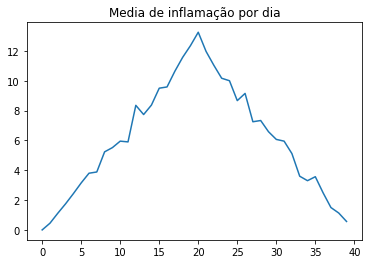

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(0,40),dados.mean(axis=0))
plt.title('Media de inflamação por dia')
plt.show()

Criando um subplot com as taxas de inflamação diária média, máxima e mínima para um único conjunto de dados

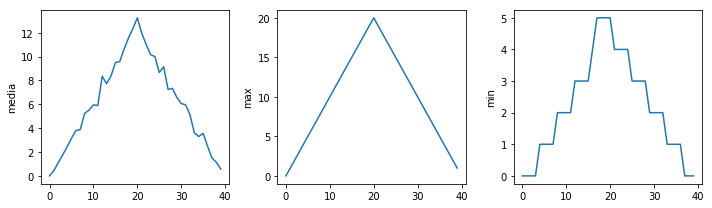

In [166]:
plt.figure(figsize=(10.0, 3.0))
    
plt.subplot(1, 3, 1)
plt.ylabel('media')
plt.plot(range(0,40),dados.mean(axis=0))

plt.subplot(1, 3, 2)
plt.ylabel('max')
plt.plot(range(0,40),dados.max(axis=0))

plt.subplot(1, 3, 3)
plt.ylabel('min')
plt.plot(range(0,40),dados.min(axis=0))

plt.tight_layout()
plt.show()

#### Exercício

Faça 4 gráficos contendo as seguintes informações:
 - Média da inflamação de todos os pacientes nos 10 primeiros dias;
 - Média da inflamação de todos os pacientes a cada 3 dias;
 - Média da inflamação dos 10 últimos pacientes nos 5 últimos dias;
 - Média de inflamação de cada paciente nos últimos 20 dias.

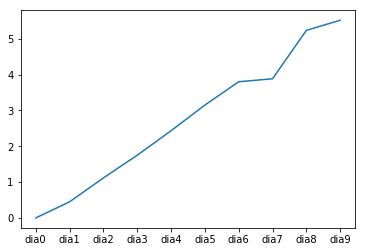

In [145]:
plt.plot(dados.iloc[:,:10].mean())
#plt.plot(dados.iloc[:,::3].mean())
#plt.plot(dados.iloc[-10:,-5:].mean())
#plt.plot(dados.iloc[:,-20:].mean())

Criando uma função chamada analyze que cria gráficos das taxas de inflamação média, máxima e mínima para um único conjunto de dados

In [189]:
def analyze(path):
    dados = pd.read_csv(path)
    
    print(path)
    plt.figure(figsize=(10.0, 3.0))

    plt.subplot(1, 3, 1)
    plt.ylabel('media')
    plt.plot(range(0,40),dados.mean(axis=0))

    plt.subplot(1, 3, 2)
    plt.ylabel('max')
    plt.plot(range(0,40),dados.max(axis=0))

    plt.subplot(1, 3, 3)
    plt.ylabel('min')
    plt.plot(range(0,40),dados.min(axis=0))

    plt.tight_layout()
    plt.show()

dados/inflammation-11.csv


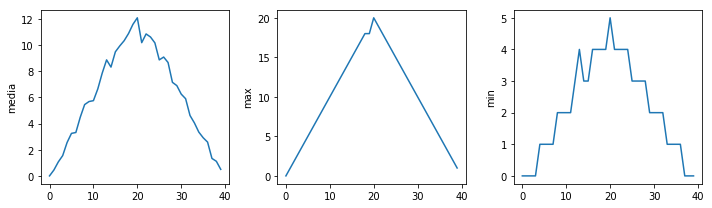

In [190]:
analyze('dados/inflammation-11.csv')

#### Exercício

Faça um loop para plotar os gráficos da função analyze de todos os 12 arquivos de dados

dados/inflammation-05.csv


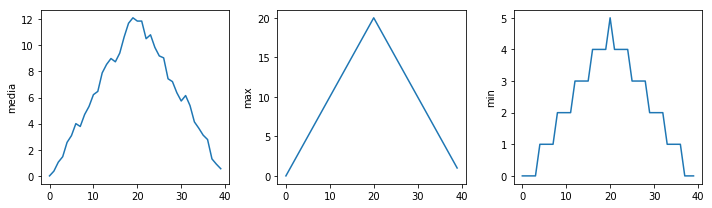

dados/inflammation-11.csv


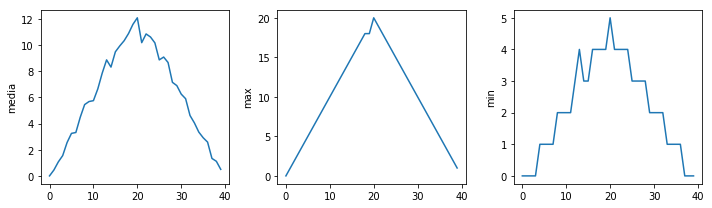

dados/inflammation-10.csv


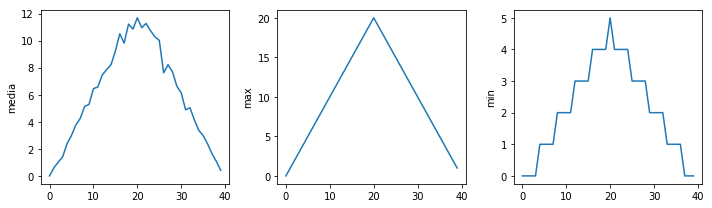

dados/inflammation-04.csv


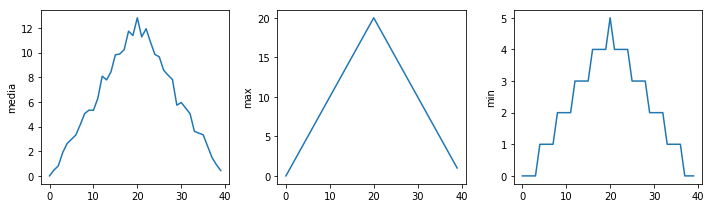

dados/inflammation-12.csv


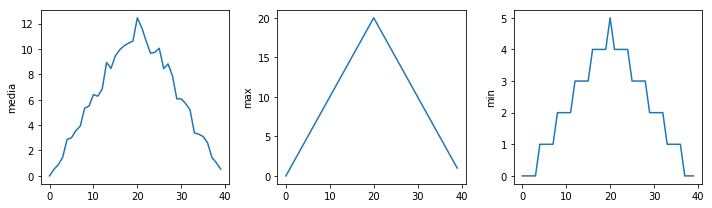

dados/inflammation-06.csv


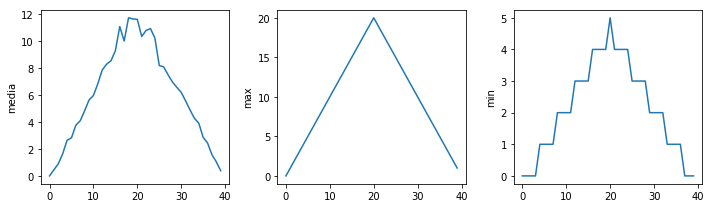

dados/inflammation-07.csv


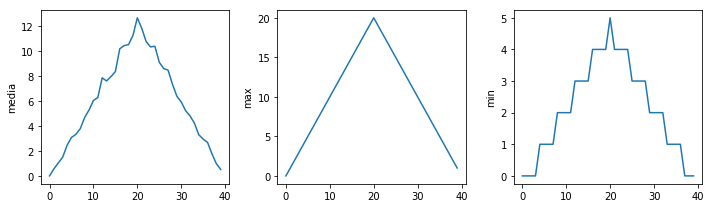

dados/inflammation-03.csv


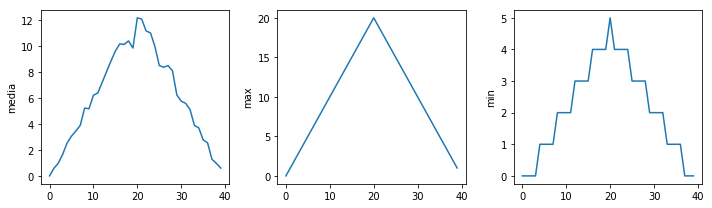

dados/inflammation-02.csv


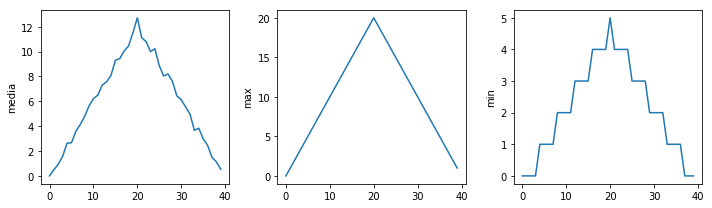

dados/inflammation-01.csv


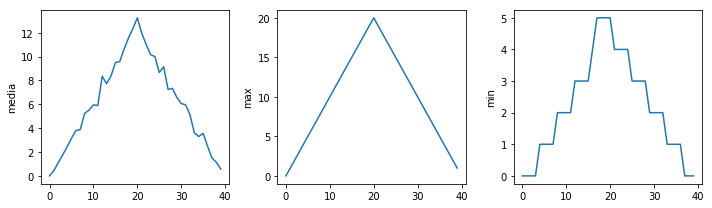

dados/inflammation-09.csv


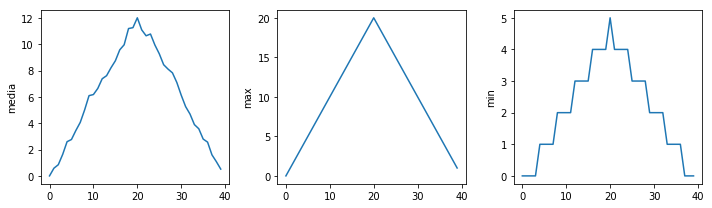

dados/inflammation-08.csv


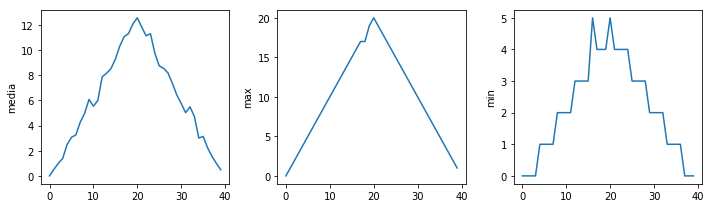

In [191]:
import glob

file_names = glob.glob('dados/*.csv')
for name in file_names:
    analyze(name)